# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>
## <span style="color:red"><center>autoencoder para el conjunto de datos Fashion MNIST, Juan David Marín</center></span>

In [68]:
import tensorflow as tf 
#
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



## Parámetros de la red Codificadora

In [29]:
input_shape = (28*28,)
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2

# Parametros de entrenamiento 
eopchs = 3
batch_size = 64


In [30]:
input_shape[0]

784

## Codificador: encoder

Model: "capa_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada_encoder (InputLayer) [(None, 784)]             0         
_________________________________________________________________
activation_90 (Activation)   (None, 784)               0         
_________________________________________________________________
capa_oculta_1 (Dense)        (None, 128)               100480    
_________________________________________________________________
activation_91 (Activation)   (None, 128)               0         
_________________________________________________________________
capa_oculta_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
activation_92 (Activation)   (None, 64)                0         
_________________________________________________________________
capa_oculta_3 (Dense)        (None, 32)               

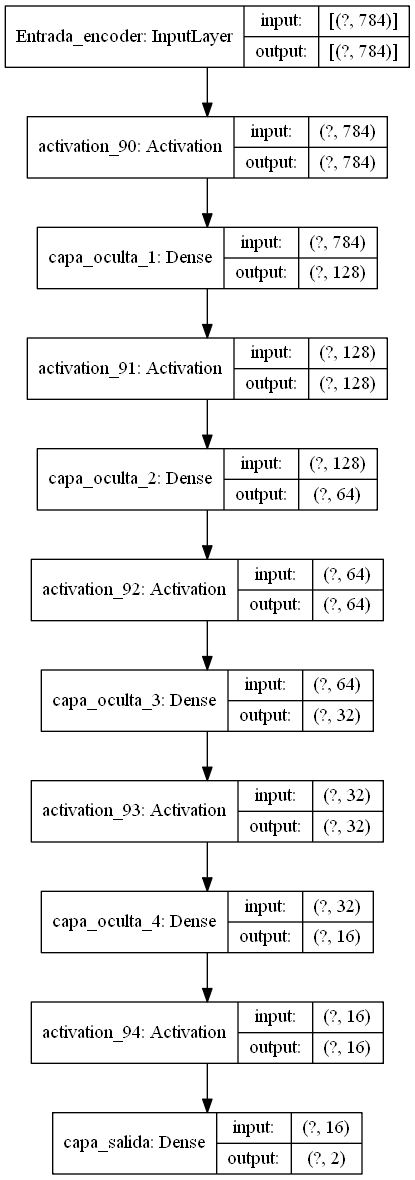

In [31]:
entradas = Input(shape=input_shape, name='Entrada_encoder')
x = Activation('relu')(entradas)
x = Dense(intermediate_dim_1, name = 'capa_oculta_1')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name = 'capa_oculta_2')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name = 'capa_oculta_3')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name = 'capa_oculta_4')(x)
x = Activation('relu')(x)

salidas = Dense(latent_dim,name= 'capa_salida')(x)

encoder = Model(inputs=entradas, outputs = salidas, name = 'capa_encoder')

encoder.summary()
plot_model(encoder, show_shapes=True)



## Decodificador: decoder

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada_decoder (InputLayer) [(None, 2)]               0         
_________________________________________________________________
capa_oculta_4 (Dense)        (None, 16)                48        
_________________________________________________________________
activation_108 (Activation)  (None, 16)                0         
_________________________________________________________________
capa_oculta_3 (Dense)        (None, 32)                544       
_________________________________________________________________
activation_109 (Activation)  (None, 32)                0         
_________________________________________________________________
capa_oculta_2 (Dense)        (None, 64)                2112      
_________________________________________________________________
activation_110 (Activation)  (None, 64)                0   

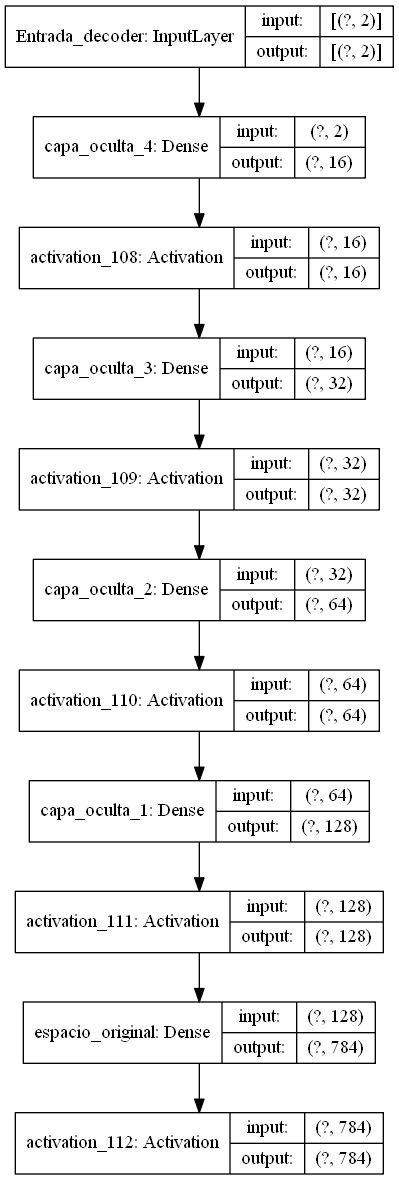

In [34]:
# Definir el modelo de decoder

latent_input = Input(shape=(latent_dim,), name = 'Entrada_decoder')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4, name = 'capa_oculta_4')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name = 'capa_oculta_3')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name = 'capa_oculta_2')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1, name = 'capa_oculta_1')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name = 'espacio_original')(x)
x = Activation('sigmoid')(x)

decoder = Model(inputs = latent_input, outputs = x, name = 'decoder')

decoder.summary()

plot_model(decoder, show_shapes=True)



# Auto~codificador: auto-encoder

Model: "autoencoder_fashion_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada_encoder (InputLayer) [(None, 784)]             0         
_________________________________________________________________
capa_encoder (Functional)    (None, 2)                 111378    
_________________________________________________________________
decoder (Functional)         (None, 784)               112160    
Total params: 223,538
Trainable params: 223,538
Non-trainable params: 0
_________________________________________________________________


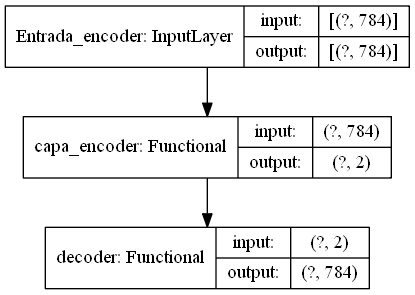

In [36]:
# Modelo Autoencoder
autoencoder = Model(inputs = entradas, outputs = decoder(encoder(entradas)),
                    name = 'autoencoder_fashion_MNIST')

autoencoder.summary()
plot_model(autoencoder, show_shapes=True)

## Entrenamiento

In [64]:
# Compilar 
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer=optimizer, loss=loss_fn)

# Carga los datos

In [65]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Aplanar los datos 
x_train = x_train.reshape(60000,784).astype('float32')/255. 
x_test = x_test.reshape(10000,784).astype('float32')/255. 
# Redefinir las epocas y el batch_size
epochs = 20
batch_size = 64

## Epochs

In [120]:
history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0263 - val_loss: 0.0258
Epoch 2/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0255 - val_loss: 0.0261
Epoch 3/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0255 - val_loss: 0.0257
Epoch 4/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0251 - val_loss: 0.0252
Epoch 5/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0250 - val_loss: 0.0258
Epoch 6/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0249 - val_loss: 0.0251
Epoch 7/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0263 - val_loss: 0.0275
Epoch 8/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0269 - val_loss: 0.0272
Epoch 9/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0265 - val_loss: 0.0264
Epoch 10/20
844/844 [==============================] - 3s 4ms/step - loss: 0.0259 - val_loss: 0.0261

In [121]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
15,0.025730,0.026472,15
16,0.025796,0.025820,16
17,0.025426,0.025555,17
18,0.025286,0.026326,18
19,0.025359,0.025684,19


## Pérdida

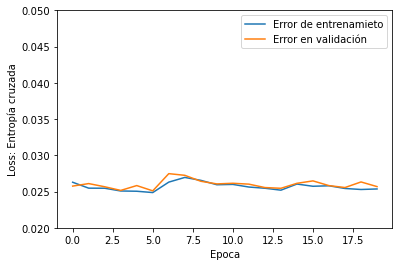

In [122]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
            label = 'Error de entrenamieto')
plt.plot(hist['epoch'], hist['val_loss'],
            label = 'Error en validación')
plt.ylim([0.02,0.05])
plt.legend()
plt.show()

<ipython-input-134-cb2147e40d03>:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0.0,0.03])


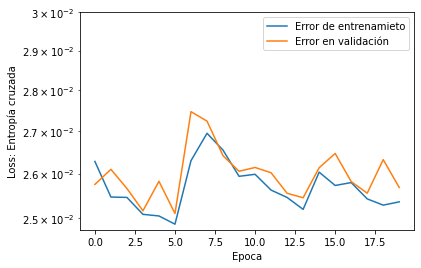

In [134]:
plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.semilogy(hist['epoch'], hist['loss'],
            label = 'Error de entrenamieto')
plt.semilogy(hist['epoch'], hist['val_loss'],
            label = 'Error en validación')
plt.ylim([0.0,0.03])
plt.legend()
plt.show()

# Evaluación externa

In [124]:
autoencoder.evaluate(x_test,x_test)
autoencoder.evaluate(x_train,x_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251


0.025072501972317696

## Recuperación de imágenes

In [125]:
def reconstruir_image(img_original, img_decoded, image_size=28, num_images=8, random=True, file_name=None):
    
     #Controlar el némero de imagenes, 16 maximo
    if num_images > 10:
        num_images = 10
    
    # Seleccionar imagenes
    if random:
        shape_0 = img_original.shape[0]
        index = np.random.randint(low=0, high=shape_0, size=num_images)
    else:
        index = range(num_images) 
 
    imgs = np.concatenate([img_original[index], img_decoded[index]])
    imgs = imgs.reshape((2, num_images, image_size, image_size))
    imgs = np.vstack([np.hstack(i) for i in imgs])
    
 
    plt.axis('off')
    plt.title('Entrada: Primera Fila, Decodificado: Segunda fila')
    plt.imshow(1-imgs, interpolation='none', cmap='gray')

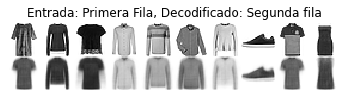

In [126]:
reconstruir_image(img_original= x_test, img_decoded=autoencoder.predict(x_test), 
                         image_size=28, num_images= 25, random=True
                        )

## Representación latente

In [127]:
def plot2D(x_latent, y_label,
           sample_percent = 100, #show 100% by default
           xmin=-4.0, ymin=-4.0,
           xmax=4.0,  ymax=4.0,
           filename=None,
           xlabel='Dim 1',
           ylabel='Dim 2',
           title='Latent Space-2D'):
    
    
    # select sample to reduce the data
    if sample_percent>=100:
        sample_percent= 100
    elif sample_percent<=0:
        sample_percent= 10
    if sample_percent!=100:
        shape_0 = x_latent.shape[0]
        size = int(shape_0*sample_percent/100)
        index = index = np.random.randint(low=0, high=shape_0, size=size)
        z = x_latent[index]
        y_test = y_label[index]
    else:
        z = x_latent
        y_test = y_label
    
    
    # configure the plot
    #fig, ax = plt.subplots(figsize=(20, 16))
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_xlabel(xlabel,fontsize=12)
    ax.set_ylabel(ylabel,fontsize=12)
    ax.set_title(title,fontsize=15)
    ax.grid(True)
    
    # plot
    #plt.scatter(z[:, 0], z[:, 1], marker="")
    ax.scatter(z[:, 0], z[:, 1], c=y_label ,alpha=0.1, edgecolors='none')
    for i, digit in enumerate(y_test):
        ax.annotate(digit, (z[i, 0], z[i, 1]))
   

    plt.show()

In [110]:
# extract encoding data to future use
x_train_latent = encoder(x_train)
x_train_latent = x_train_latent.numpy()

x_test_latent = encoder(x_test)
x_test_latent = x_test_latent.numpy()

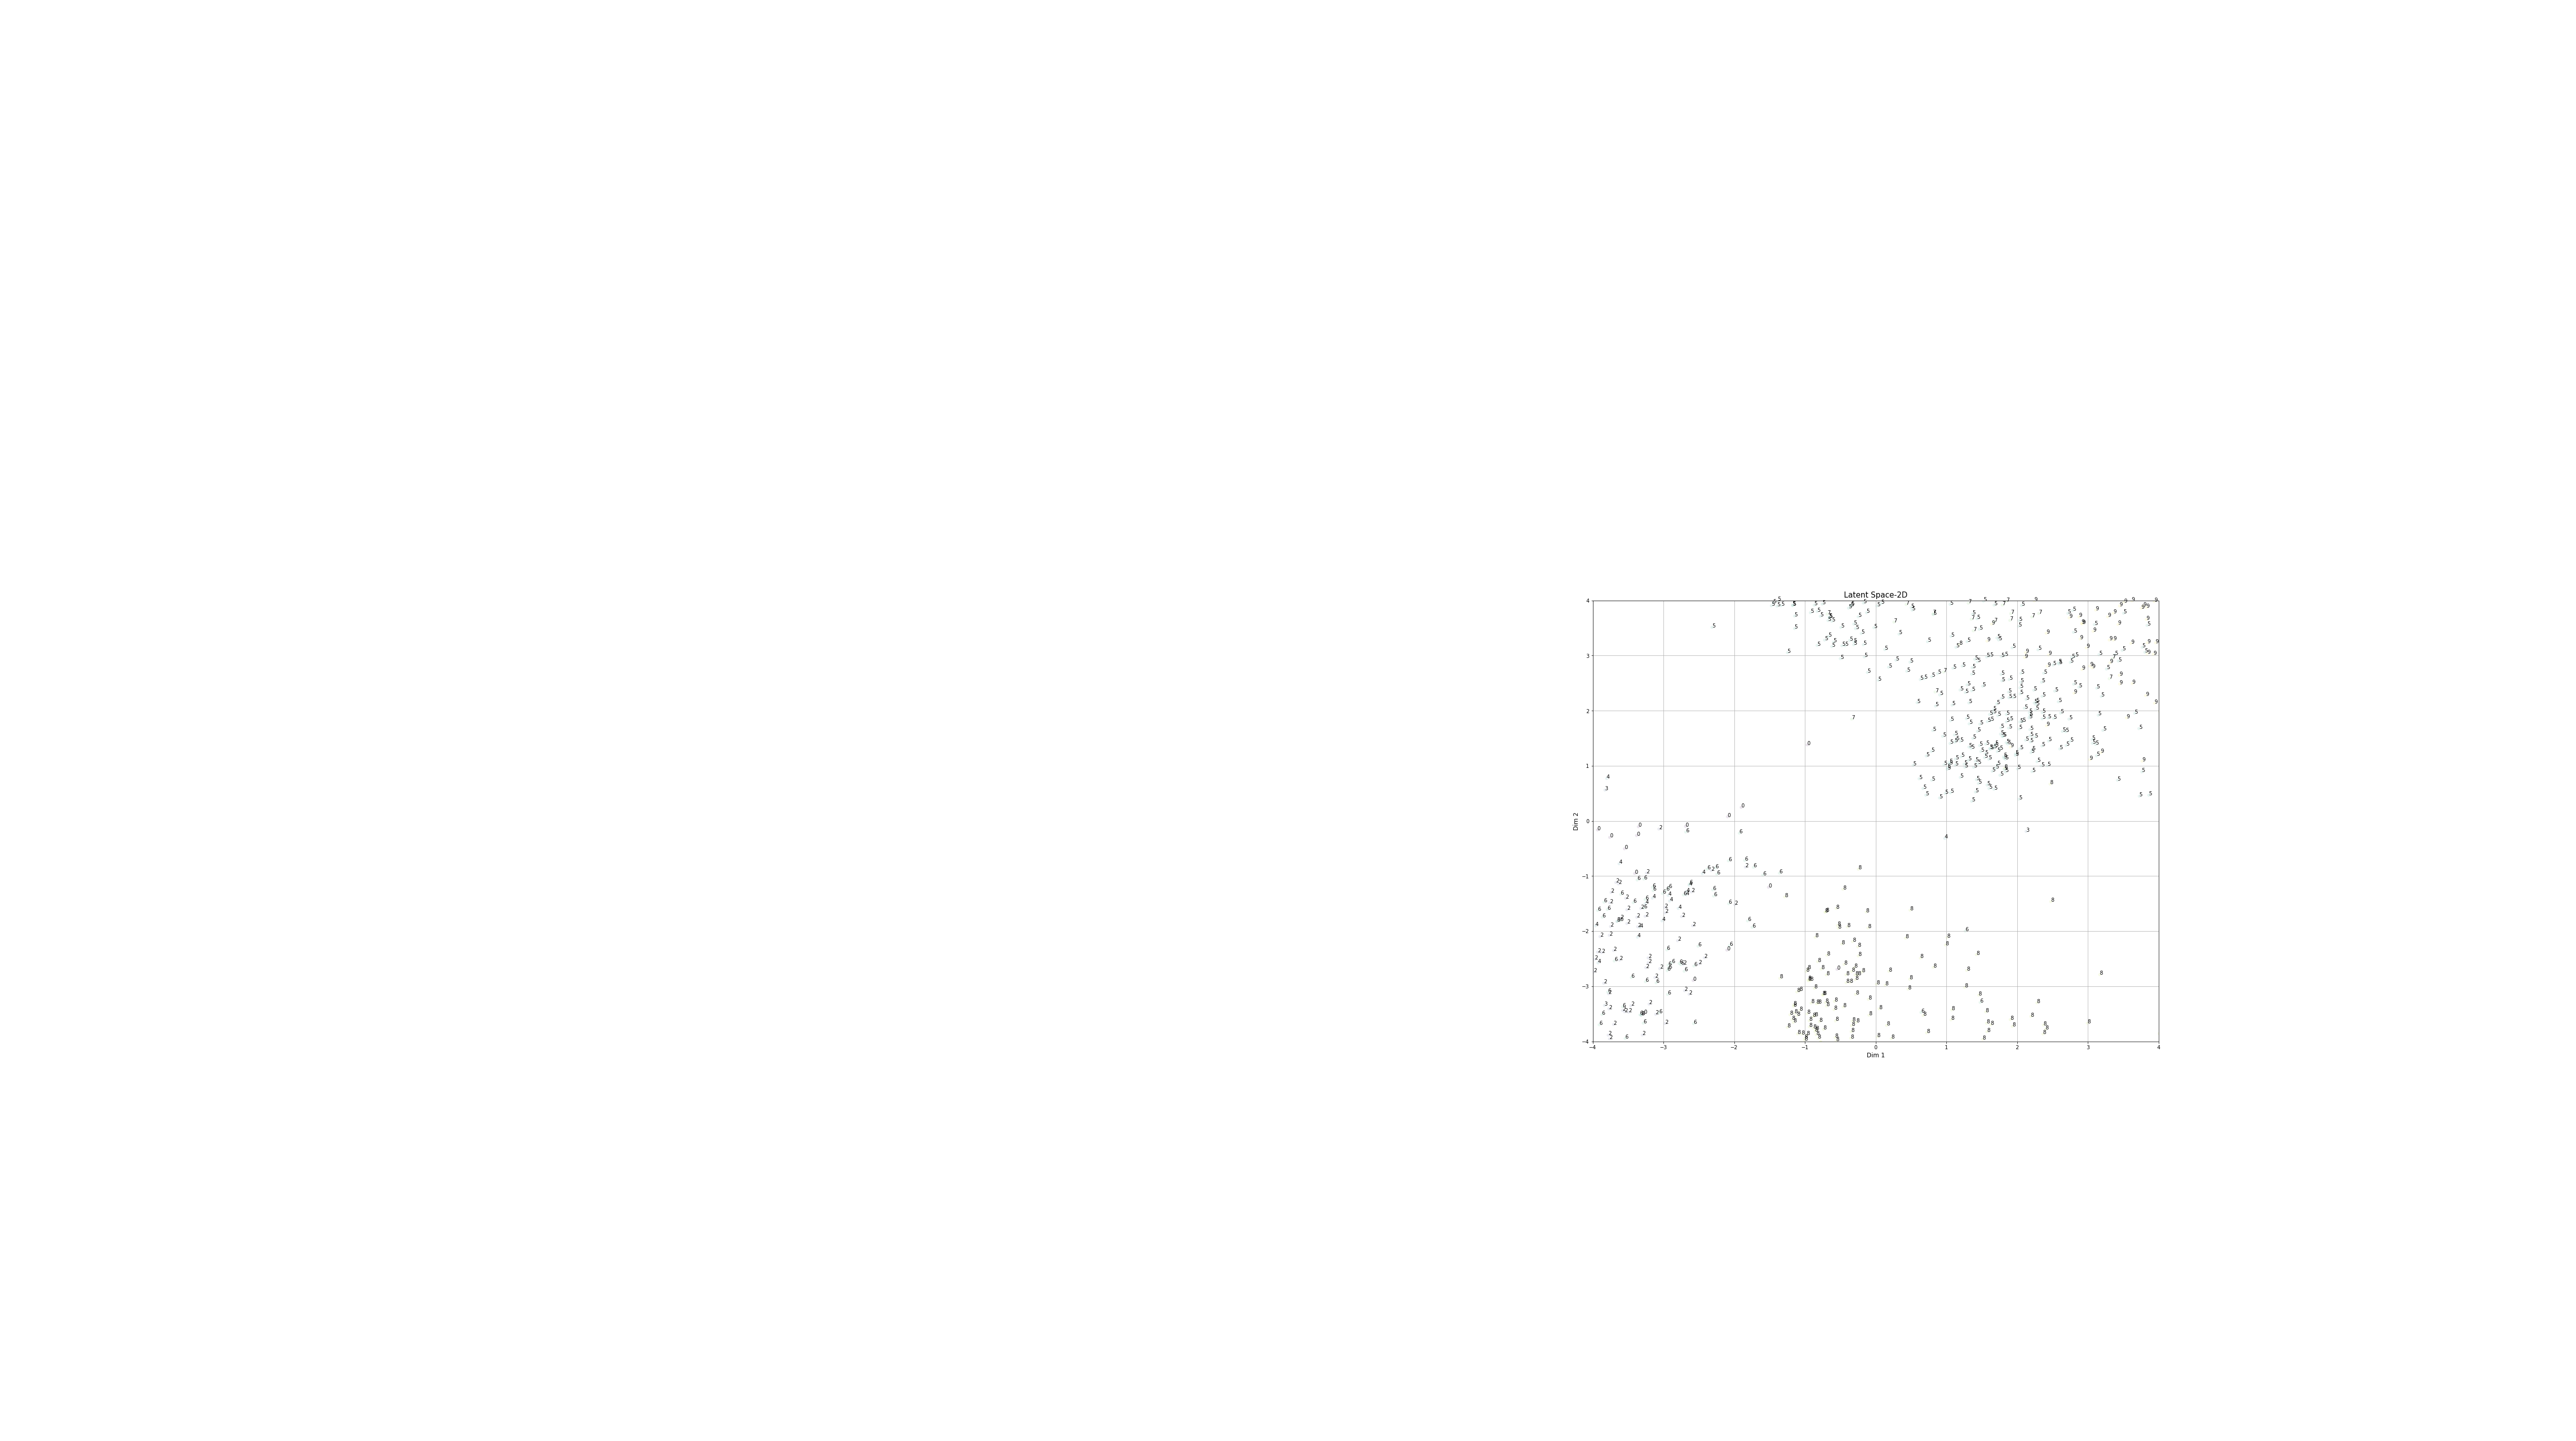

In [128]:
plot2D(x_test_latent[0::2], y_test[0::2])